Manual Neural Network

In [58]:
class SimpleClass():
    
    def __init__(self):
        print("hello")

In [59]:
s = "world"

In [60]:
type(s)

str

In [61]:
x = SimpleClass()

hello


In [62]:
x

In [63]:
class SimpleClass():
    
    def __init__(self):
        print("hello")
        
    def yell(self):
        print("yelling")

In [64]:
x = SimpleClass()

hello


In [65]:
x.yell()

yelling


In [66]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__()
        print("Extend")

In [67]:
y = ExtendedClass()

hello
Extend


## Part 2

## Operation

In [92]:
class Operation():
    
    def __init__(self,input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
            _default_graph.operations.append(self)
            
    def compute(self):
        pass 

In [93]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        
        return x_var + y_var
    

In [94]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        
        return x_var * y_var
    

In [95]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        
        return x_var.dot(y_var)
    

## L22 - Manual NN

In [96]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [97]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [98]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10
b = 1

z = 10x + 1

In [99]:
g = Graph()

In [100]:
g.set_as_default()

In [101]:
A = Variable(10)

In [102]:
b = Variable(1)

In [103]:
x = Placeholder()

In [104]:
y = multiply(A,x)

In [105]:
z = add(y,b)

## L23

In [106]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [119]:
class Session():
    
    def run(self,opeartion,feed_dict ={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                #Operation
                node.inputs = [input_node.output for input_node in node.input_node]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
    

In [117]:
sess = Session()

In [120]:
result = sess.run(operation = z,feed_dict = {x:10})

TypeError: run() got an unexpected keyword argument 'operation'

In [56]:
result

NameError: name 'result' is not defined

In [122]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2,])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [123]:
sess = Session()

In [ ]:
sess.run(operation = z)

#CLassification

#Activation Function

In [127]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [128]:
def sigmoid(z):
    
    return 1/(1+ np.exp(-z))

In [129]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

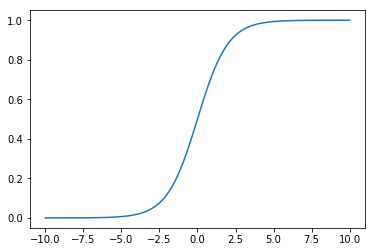

In [130]:
plt.plot(sample_z,sample_a)

In [167]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def comput(self,z_val):
        return 1/(1+ np.exp(-z_val))

In [168]:
from sklearn.datasets import make_blobs

In [169]:
data = make_blobs(n_samples = 50,n_features = 2,centers = 2,random_state=75)

In [170]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [171]:
type(data)

tuple

In [172]:
features = data[0]
labels = data[1]

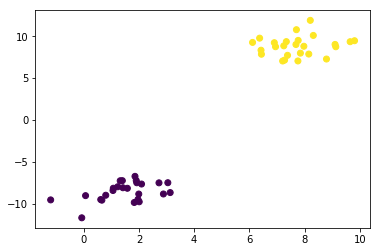

In [173]:
plt.scatter(features[:,0],features[:,1],c = labels)

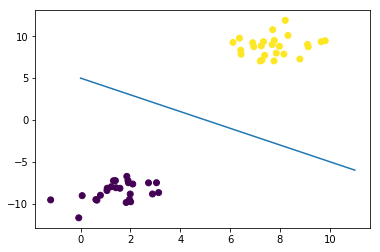

In [174]:
x = np.linspace(0,11,10)
y = - x + 5
plt.scatter(features[:,0],features[:,1],c = labels)
plt.plot(x,y)

(1,1) * f - 5  = 0

In [175]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [176]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [177]:
g = Graph()

In [178]:
g.set_as_default()

In [179]:
x = Placeholder()

In [180]:
w = Variable([1,1])

In [181]:
b = Variable(-5)

In [182]:
z = add(matmul(w,x),b)

In [183]:
a = Sigmoid(z)

In [184]:
sess = Session()

In [185]:
sess.run(operation = a,feed_dict = {x:[8,10]})

TypeError: run() got an unexpected keyword argument 'operation'